K-Means 聚类分析生成与华东师范大学学术特征类似的高校列表

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

folder_path = r"E:\HuaweiMoveData\Users\liuzhihan\Desktop\download\download"
all_universities = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        discipline = filename.split(".")[0].replace("_", " ").title()
        file_path = os.path.join(folder_path, filename)
        
        df = pd.read_csv(file_path, encoding='iso-8859-1', header=1, skipfooter=1, engine='python')
        df = df.iloc[:, [0, 1, 3, 4, 5]]
        df.columns = ["Rank","Institutions", "Cites", "Cites_Per_Paper", "Top_Papers"]
        df["discipline"] = discipline  
        
        all_universities = pd.concat([all_universities, df], ignore_index=True)

all_universities = all_universities.drop_duplicates(subset="Institutions", keep="first")

features = ["Cites", "Cites_Per_Paper", "Top_Papers"]
X = all_universities[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
all_universities["cluster_label"] = kmeans.fit_predict(X_scaled)

ecnu_cluster = all_universities[all_universities["Institutions"] == "EAST CHINA NORMAL UNIVERSITY"]["cluster_label"].values[0]
similar_universities = all_universities[all_universities["cluster_label"] == ecnu_cluster][["Institutions", "discipline", "Rank"]]

print("===== 与华东师范大学类似的高校 =====")
print(similar_universities)
similar_universities.to_excel("华师大类似高校聚类结果.xlsx", index=False)

===== 与华东师范大学类似的高校 =====
                                            Institutions  \
158                                             CIBEROBN   
159                                  UNIVERSITY OF LEEDS   
165                                UNIVERSITY OF READING   
166              CATHOLIC UNIVERSITY OF THE SACRED HEART   
170                            KING ABDULAZIZ UNIVERSITY   
...                                                  ...   
33862  INSTITUT FUR WELTWIRTSCHAFT AN DER UNIVERSITAT...   
33869                                      WALAILAK UNIV   
33872                             UNIVERSITY OF MACERATA   
33882                              UNIV HUMANIST STUDIES   
33883                      ALZHEIMERS DRUG DISCOVERY FDN   

                     discipline  Rank  
158       Agricultural Sciences   159  
159       Agricultural Sciences   160  
165       Agricultural Sciences   166  
166       Agricultural Sciences   167  
170       Agricultural Sciences   171  
...           

绘制肘部图并结合轮廓系数确定最优聚类数

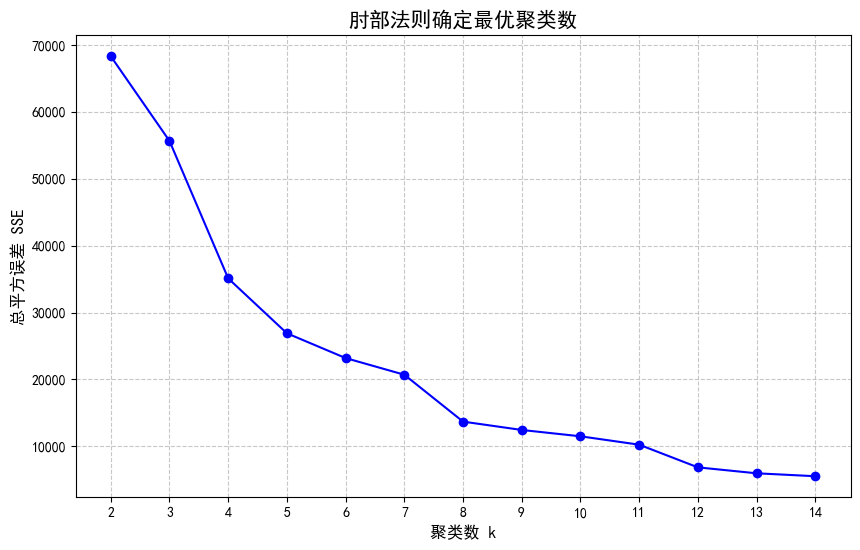

通过轮廓系数确定的最优聚类数: k=2


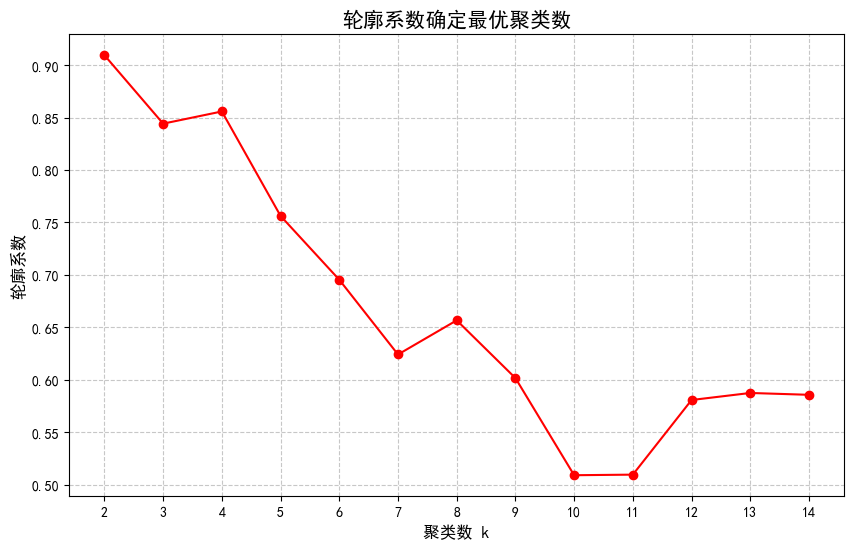

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

features = ["Cites", "Cites_Per_Paper", "Top_Papers"]
X = all_universities[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 肘部法则
sse = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 绘图
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', color='b')
plt.title('肘部法则确定最优聚类数', fontsize=15)
plt.xlabel('聚类数 k', fontsize=12)
plt.ylabel('总平方误差 SSE', fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#轮廓系数
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"通过轮廓系数确定的最优聚类数: k={best_k}")

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='r')
plt.title('轮廓系数确定最优聚类数', fontsize=15)
plt.xlabel('聚类数 k', fontsize=12)
plt.ylabel('轮廓系数', fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()